In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
def show(image): 
    plt.imshow(image) 
    plt.axis('off') 
    plt.show()

In [8]:
cd '/content/drive/My Drive/Code/SEM shape'

/content/drive/My Drive/Code/SEM shape


(1628, 1640, 3)


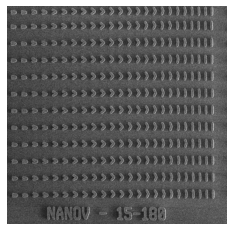

In [9]:
#import image and show image with right color
img = cv2.imread('V_full.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#print image size and show image
print(img.shape)
show(img)


(512, 512, 3)


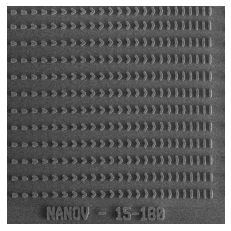

True

In [11]:
crop_img = cv2.resize(img, (512, 512), 3, 3)
print(crop_img.shape)
show(crop_img)
cv2.imwrite('V_full_resize.png', crop_img)

(340, 340, 3)


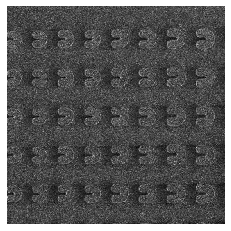

In [0]:
#Crop image with defined size
crop_img = img[10:350, 460:800]
print(crop_img.shape)
show(crop_img)

(224, 224, 3)


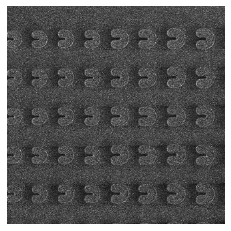

In [0]:
crop_img = cv2.resize(crop_img, (224, 224), 3, 3)
print(crop_img.shape)
show(crop_img)

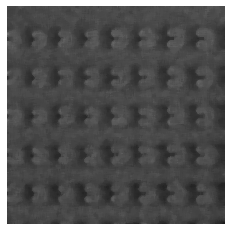

In [0]:
# Smoothen image
median = cv2.medianBlur(crop_img, 5)
show(median)

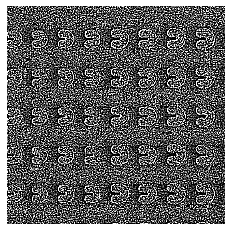

In [0]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharp = cv2.filter2D(median, -1, kernel)
show(sharp)

In [0]:
cv2.imwrite('NanoC.png', crop_img)

True

In [75]:
import h5py as h5

In [76]:
cd /content/drive/My Drive/Code/SEM shape

[Errno 2] No such file or directory: '/content/drive/My Drive/Code/SEM shape'
/Users/chingtingtsai/Google Drive/Code/SEM shape


In [77]:
data = h5.File("V3.h5")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [78]:
data.keys()

<KeysViewHDF5 ['exported_data']>

In [79]:
img = np.asarray(data["exported_data"])

In [80]:
img2 = img[:,:,0]>0.7

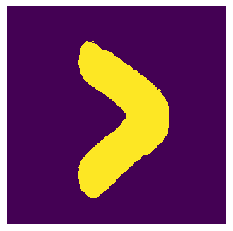

In [81]:
show(img2)

In [38]:
cv2.imwrite('V2.png',img[:,:,0])

True

In [39]:
import imageio as io

In [40]:
binary = img2.astype(np.uint8)

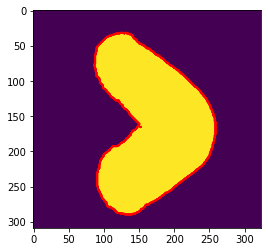

In [41]:
plt.imshow(binary)
plt.contour(binary,colors='r')
plt.savefig('V2.png')